<a href="https://colab.research.google.com/github/Visshwajit87/sample2/blob/main/DAy_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

# DAY 16 FULL ML PROGRAM – CALIFORNIA HOUSING NN
# Import the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

import tensorflow as tf
from tensorflow.keras import layers, models

# For comparison
from sklearn.ensemble import RandomForestRegressor

In [3]:

# 1. LOAD & PREPARE DATA

data = fetch_california_housing(as_frame=True)
df = data.frame.copy()

X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Validation split from training data
X_train_scaled, X_val_scaled, y_train, y_val = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42
)

print("Data preparation complete.\n")


Data preparation complete.



In [5]:
from tensorflow import keras
from tensorflow.keras import layers

# 2. BUILD NEURAL NETWORK MODEL

def build_model(neurons1=64, neurons2=32, l2=None, dropout=None):
    model = keras.Sequential()
    if l2:
        reg = keras.regularizers.l2(l2)
    else:
        reg = None
    model.add(layers.Dense(neurons1, activation='relu', kernel_regularizer=reg))
    if dropout:
        model.add(layers.Dropout(dropout))
    model.add(layers.Dense(neurons2, activation='relu', kernel_regularizer=reg))
    if dropout:
        model.add(layers.Dropout(dropout))
    model.add(layers.Dense(1))  # Regression output (no activation)
    model.compile(
        optimizer=keras.optimizers.Adam(),
        loss='mse',
        metrics=['mae']
    )
    return model
model = build_model()
print(model.summary())


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


Epoch 1/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 1.6766 - mae: 0.9149 - val_loss: 0.4759 - val_mae: 0.5033
Epoch 2/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4195 - mae: 0.4624 - val_loss: 0.4143 - val_mae: 0.4682
Epoch 3/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3739 - mae: 0.4370 - val_loss: 0.4324 - val_mae: 0.4370
Epoch 4/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3587 - mae: 0.4180 - val_loss: 0.4099 - val_mae: 0.4438
Epoch 5/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3454 - mae: 0.4126 - val_loss: 0.3601 - val_mae: 0.4264
Epoch 6/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3343 - mae: 0.4038 - val_loss: 0.4037 - val_mae: 0.4133
Epoch 7/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3226 - mae: 0.3961 - val_loss: 0.3594 - val_mae: 0.4097
Epoch 8/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3117 - mae: 0.3922 - val_loss: 0.3616 - val_mae: 0.4132
Epoch 9/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - lo

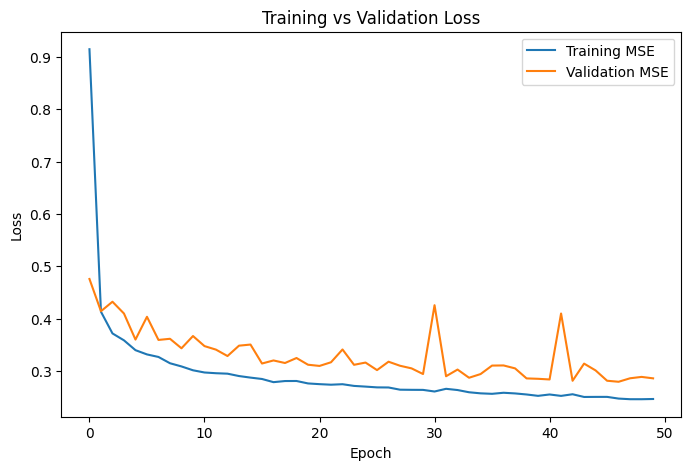


Training complete.



In [6]:

# 3. TRAIN MODEL

history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)

# Plot loss curves
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training MSE')
plt.plot(history.history['val_loss'], label='Validation MSE')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

print("\nTraining complete.\n")


In [7]:

# 4. OVERFITTING ANALYSIS

train_loss_end = history.history["loss"][-1]
val_loss_end = history.history["val_loss"][-1]

print(f"Final Training Loss: {train_loss_end:.4f}")
print(f"Final Validation Loss: {val_loss_end:.4f}")

if val_loss_end > train_loss_end:
    print("\n⚠ Overfitting detected: validation loss is increasing.\n")
else:
    print("\nNo major overfitting detected.\n")


Final Training Loss: 0.2467
Final Validation Loss: 0.2861

⚠ Overfitting detected: validation loss is increasing.



In [16]:
# 5. FINAL EVALUATION ON TEST SET

# Neural Network prediction
y_pred = model.predict(X_test_scaled).flatten()
nn_mae = mean_absolute_error(y_test, y_pred)
print(f"Neural Network Test MAE: {nn_mae:.4f}")

# --------------------------------------------------
# Compare with Random Forest (use unscaled X values)
# --------------------------------------------------

rf = RandomForestRegressor(n_estimators=200, random_state=42)

# FIX: y_train was modified during validation split.
# We must use the original 'y' values aligned with X_train's index.
rf.fit(X_train, y.loc[X_train.index])

# Predictions
rf_pred = rf.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_pred)
print(f"RandomForest Test MAE: {rf_mae:.4f}")

# Compare models
if nn_mae < rf_mae:
    print("\nNeural Network performed better.\n")
else:
    print("\nRandomForest performed better.\n")


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Neural Network Test MAE: 0.3651
RandomForest Test MAE: 0.3268

RandomForest performed better.



In [14]:

# 6. EXPERIMENTS A–D

results = {}

# Experiment A: Change neurons
print("Running Experiment A...")
for n in [32, 128]:
    exp_model = build_model(neurons1=n, neurons2=n//2)
    exp_model.fit(X_train_scaled, y_train,
                  validation_data=(X_val_scaled, y_val),
                  epochs=50, batch_size=32, verbose=0)
    pred = exp_model.predict(X_test_scaled)
    results[f"Neurons_{n}"] = mean_absolute_error(y_test, pred)

# Experiment B: Change batch sizes
print("Running Experiment B...")
for b in [16, 128]:
    exp_model = build_model()
    exp_model.fit(X_train_scaled, y_train,
                  validation_data=(X_val_scaled, y_val),
                  epochs=50, batch_size=b, verbose=0)
    pred = exp_model.predict(X_test_scaled)
    results[f"Batch_{b}"] = mean_absolute_error(y_test, pred)

# Experiment C: Regularization
print("Running Experiment C...")
exp_model = build_model(l2=0.01)
exp_model.fit(X_train_scaled, y_train,
              validation_data=(X_val_scaled, y_val),
              epochs=50, batch_size=32, verbose=0)
pred = exp_model.predict(X_test_scaled)
results["L2_reg"] = mean_absolute_error(y_test, pred)

exp_model = build_model(dropout=0.3)
exp_model.fit(X_train_scaled, y_train,
              validation_data=(X_val_scaled, y_val),
              epochs=50, batch_size=32, verbose=0)
pred = exp_model.predict(X_test_scaled)
results["Dropout"] = mean_absolute_error(y_test, pred)

# Experiment D: Fewer epochs
print("Running Experiment D...")
exp_model = build_model()
exp_model.fit(X_train_scaled, y_train,
              validation_data=(X_val_scaled, y_val),
              epochs=20, batch_size=32, verbose=0)
pred = exp_model.predict(X_test_scaled)
results["Epochs_20"] = mean_absolute_error(y_test, pred)



Running Experiment A...
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Running Experiment B...
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Running Experiment C...
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Running Experiment D...
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [15]:
# 7. DISPLAY EXPERIMENT RESULTS

print("\nEXPERIMENT RESULTS (MAE):")
for k, v in results.items():
    print(f"{k}: {v:.4f}")





EXPERIMENT RESULTS (MAE):
Neurons_32: 0.3636
Neurons_128: 0.3518
Batch_16: 0.3476
Batch_128: 0.3714
L2_reg: 0.3990
Dropout: 0.3754
Epochs_20: 0.3981
